In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
#pip install fuzzywuzzy
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_normalized.csv"
df = pd.read_csv(path, encoding='latin1')
df

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL
0,1.0,0.357143,0.558140,0.451748,0.613359,0.625,0.652174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.357143,0.604651,0.579439,0.417745,0.625,0.391304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.571429,0.883721,0.434122,0.536558,0.625,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.500000,0.860465,0.520532,0.633308,0.625,0.304348,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.500000,0.790698,0.347193,0.438044,0.625,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,1.0,0.500000,0.860465,0.467650,0.461908,1.000,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
118563,1.0,0.500000,0.604651,0.447814,0.577559,1.000,0.869565,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118564,0.0,0.357143,0.837209,0.381723,0.638353,1.000,0.782609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
118565,1.0,0.500000,0.837209,0.416223,0.603161,1.000,0.565217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### נשתמש בדגימות של הדאטה כי יש בעיה בזיכרון 

In [3]:
# Define the desired sample size
sample_size = 15000 

# Randomly sample the data
sampled_data = df.sample(n=sample_size, random_state=42)

In [4]:
# Perform divisive hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=50)
clusters = clustering.fit_predict(sampled_data)
print(clusters)


[2 2 1 ... 2 0 2]


In [5]:
sampled_data['Cluster'] = clusters
sampled_data

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL,Cluster
65929,1.0,0.500000,0.813953,0.542975,0.422943,0.250,0.695652,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
95845,0.0,0.714286,0.837209,0.470720,0.638640,0.250,0.347826,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
87129,1.0,0.571429,0.372093,0.503691,0.718075,0.375,0.913043,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
34468,1.0,0.500000,0.767442,0.527037,0.629132,0.875,0.652174,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
103357,0.0,0.428571,0.790698,0.453065,0.540032,0.375,0.652174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72159,1.0,0.642857,0.744186,0.527609,0.465977,0.000,0.956522,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
17252,1.0,0.357143,0.558140,0.321078,0.612897,0.750,0.478261,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
34252,1.0,0.500000,0.906977,0.403783,0.594753,0.875,0.217391,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
82993,1.0,0.571429,0.581395,0.334985,0.758406,0.250,0.565217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [6]:
cluster_stats = sampled_data.groupby('Cluster').mean()
cluster_stats

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.497496,0.493942,0.715767,0.448947,0.604359,0.471619,0.558133,0.000000,0.000000,0.000000,...,0.028381,0.132220,0.046411,0.176294,0.000668,0.371285,0.332888,0.000000,0.000000,0.295159
1,0.547630,0.520208,0.712581,0.445829,0.619132,0.470620,0.613795,0.001436,0.015318,0.000000,...,0.025371,0.120632,0.135950,0.151747,0.069411,0.436094,0.222595,0.001915,0.002872,0.267113
2,0.487911,0.511487,0.703366,0.460569,0.587302,0.415716,0.583763,0.002737,0.043111,0.000684,...,0.018476,0.041971,0.067746,0.228102,0.085310,0.421533,0.244754,0.064097,0.000684,0.183622
3,0.509713,0.496828,0.706688,0.463422,0.581681,0.438830,0.531191,0.002775,0.024977,0.000000,...,0.031452,0.086957,0.062905,0.209991,0.055504,0.382054,0.308973,0.012026,0.000000,0.241443
4,0.527872,0.499273,0.695555,0.457817,0.589360,0.409537,0.573985,0.000969,0.046049,0.000000,...,0.020843,0.098400,0.141541,0.175957,0.020843,0.407659,0.279205,0.031023,0.000969,0.260301
5,0.512614,0.510667,0.692254,0.468305,0.580177,0.421670,0.573158,0.002018,0.057518,0.000000,...,0.010091,0.030272,0.077699,0.229062,0.069627,0.507568,0.230071,0.026236,0.000000,0.166498
6,0.522548,0.466408,0.692780,0.458641,0.561120,0.315676,0.577293,0.007874,0.179671,0.002863,...,0.030780,0.120258,0.063708,0.162491,0.015748,0.355762,0.289907,0.052971,0.000716,0.284896


In [7]:
print(sampled_data['Cluster'].value_counts())

2    4384
0    2995
1    2089
4    2063
6    1397
3    1081
5     991
Name: Cluster, dtype: int64


# graphs

In [8]:
df_original = sampled_data

## Driver At Fault

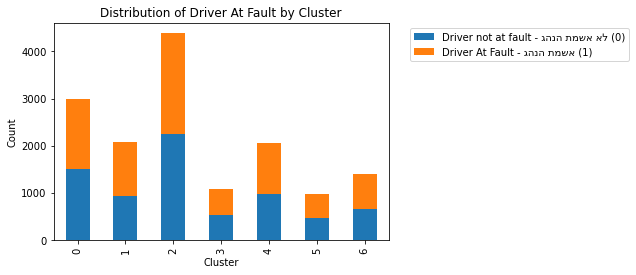

In [9]:
grouped_data = df_original.groupby(['Cluster', 'Driver At Fault']).size().unstack()

# Create the stacked bar plot
grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Driver At Fault by Cluster')

# Move the legend to the side
plt.legend(['Driver not at fault - גהנה תמשא אל (0)', 'Driver At Fault - גהנה תמשא (1)'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Speed Limit

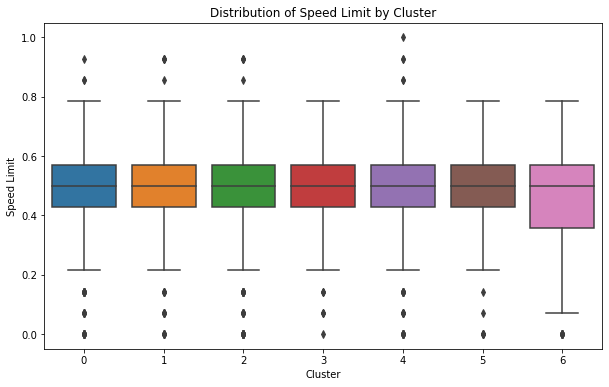

In [10]:
# Create a box plot to visualize the distribution of speed limits for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Speed Limit', data=df_original)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Speed Limit')
plt.title('Distribution of Speed Limit by Cluster')

# Show the plot
plt.show()


## Vehicle Year

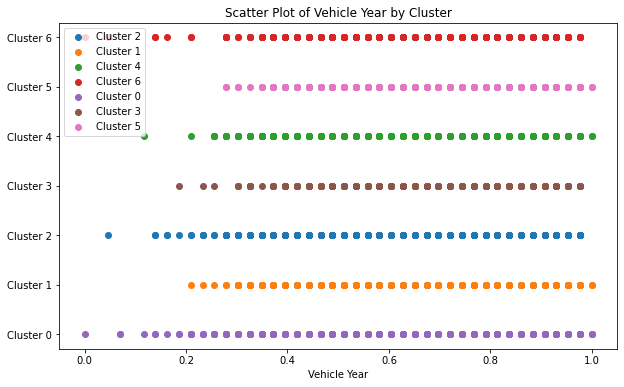

In [11]:
# Separate the data by clusters
clusters = df_original['Cluster'].unique()

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster in clusters:
    cluster_data = df_original[df_original['Cluster'] == cluster]
    plt.scatter(cluster_data['Vehicle Year'], [cluster] * len(cluster_data), label=f'Cluster {cluster}')

# Customize the plot
plt.yticks(clusters, [f'Cluster {cluster}' for cluster in clusters])
plt.xlabel('Vehicle Year')
plt.title('Scatter Plot of Vehicle Year by Cluster')
plt.legend()

# Show the plot
plt.show()


## Longitude Latitude 

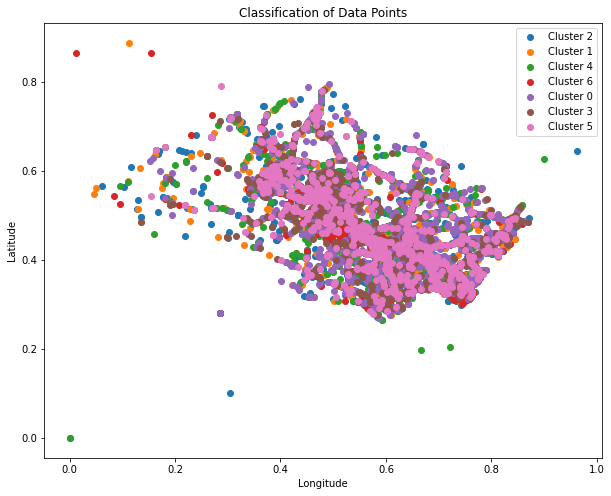

In [12]:
# Create separate DataFrames for each cluster
clusters = df_original['Cluster'].unique()

# Create the scatter plot
plt.figure(figsize=(10, 8))
for cluster in clusters:
    cluster_data = df_original[df_original['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')
    
# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Classification of Data Points')
plt.legend()

# Show the plot
plt.show()


## Year

#### השנה שבה התאונה קרתה 

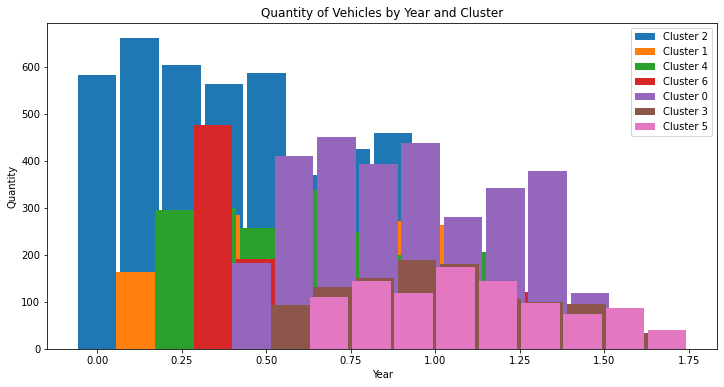

In [13]:
# Group the data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = df_original.groupby(['Year', 'Cluster']).size().unstack()

# Get the unique clusters
clusters = df_original['Cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Year and Cluster')
plt.legend()

# Show the plot
plt.show()


## Hour

#### השעה שבה התאונה קרתה

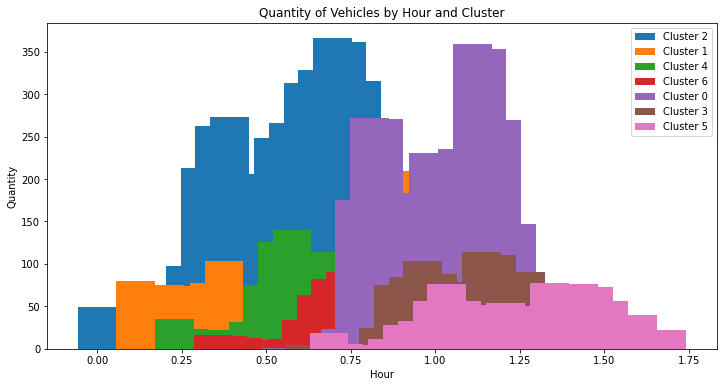

In [14]:
# Group the data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = df_original.groupby(['Hour', 'Cluster']).size().unstack()

# Get the unique clusters
clusters = df_original['Cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Hour and Cluster')
plt.legend()

# Show the plot
plt.show()


## Agency Name

<Figure size 864x432 with 0 Axes>

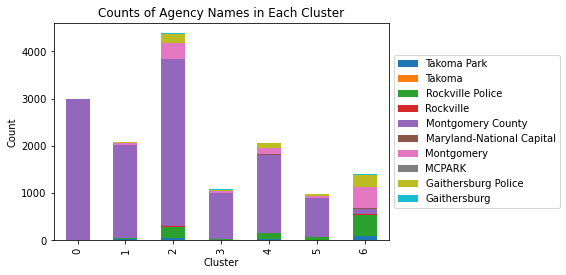

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the names for each Agency Name
agency_names = {
    'Agency Name_Takoma Park Police Depart': 'Takoma Park',
    'Agency Name_TAKOMA': 'Takoma',
    'Agency Name_Rockville Police Departme': 'Rockville Police',
    'Agency Name_ROCKVILLE': 'Rockville',
    'Agency Name_Montgomery County Police': 'Montgomery County',
    'Agency Name_Maryland-National Capital': 'Maryland-National Capital',
    'Agency Name_MONTGOMERY': 'Montgomery',
    'Agency Name_MCPARK': 'MCPARK',
    'Agency Name_Gaithersburg Police Depar': 'Gaithersburg Police',
    'Agency Name_GAITHERSBURG': 'Gaithersburg'
}

# Select the columns for Agency Name and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(agency_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Agency Name
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Agency Names in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [agency_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## ACRS Report Type

#### חומרת התאונה 
#### Property Damage Crash, Injury Crash, Fatal Crash

<Figure size 720x3600 with 0 Axes>

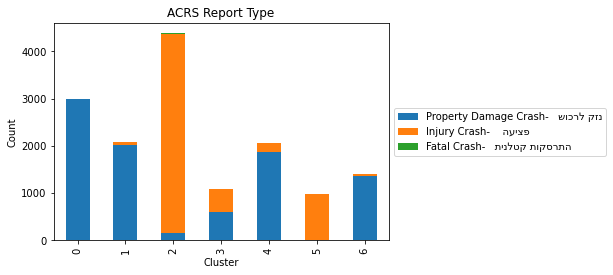

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the binary columns of Report Type and a 'Cluster' column

# Define the report type names and their corresponding labels
report_type_names = {
    'ACRS Report Type_Property Damage Crash': 'Property Damage Crash-   שוכרל קזנ',
    'ACRS Report Type_Injury Crash': 'Injury Crash-    העיצפ',
    'ACRS Report Type_Fatal Crash': 'Fatal Crash-   תינלטק תוקסרתה'
}

# Get the actual column names from the DataFrame
column_names = df_original.columns

# Map the report type names to the closest matching column names
mapped_names = {}
for report_type_name, label in report_type_names.items():
    best_match = max(column_names, key=lambda x: fuzz.ratio(report_type_name, x))
    mapped_names[best_match] = label

# Select the columns for the desired report types
selected_columns = ['Cluster'] + list(mapped_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Report Type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(10, 50))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('ACRS Report Type')

# Change the legend labels to the desired names
handles, labels = ax.get_legend_handles_labels()
labels = [report_type_names[label] for label in labels]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


##  Route Type 

<Figure size 864x432 with 0 Axes>

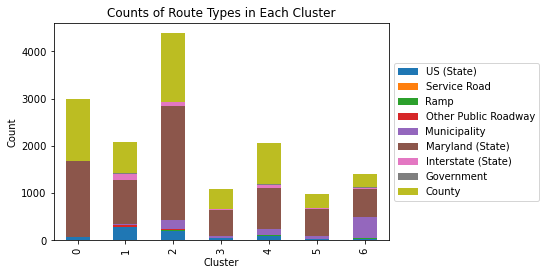

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the names for each Route Type
route_type_names = {
    'Route Type_US (State)': 'US (State)',
    'Route Type_Service Road': 'Service Road',
    'Route Type_Ramp': 'Ramp',
    'Route Type_Other Public Roadway': 'Other Public Roadway',
    'Route Type_Municipality': 'Municipality',
    'Route Type_Maryland (State)': 'Maryland (State)',
    'Route Type_Interstate (State)': 'Interstate (State)',
    'Route Type_Government': 'Government',
    'Route Type_County': 'County'
}

# Select the columns for Route Type and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(route_type_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Route Type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Route Types in Each Cluster')


# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [route_type_names[label] for label in labels]
ax.legend(handles, updated_labels,loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Weather

<Figure size 864x432 with 0 Axes>

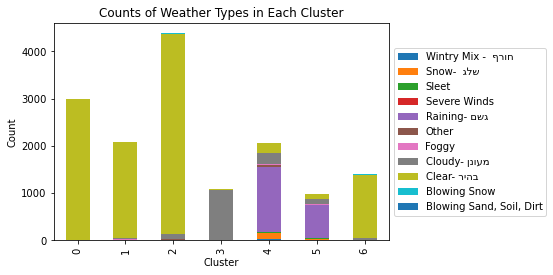

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the names for each Weather type
weather_names = {
    'Weather_WINTRY MIX': 'Wintry Mix -  ףרוח',
    'Weather_SNOW': 'Snow-  גלש',
    'Weather_SLEET': 'Sleet',
    'Weather_SEVERE WINDS': 'Severe Winds',
    'Weather_RAINING': 'Raining- םשג',
    'Weather_OTHER': 'Other',
    'Weather_FOGGY': 'Foggy',
    'Weather_CLOUDY': 'Cloudy- ןנועמ',
    'Weather_CLEAR': 'Clear- ריהב',
    'Weather_BLOWING SNOW': 'Blowing Snow',
    'Weather_BLOWING SAND, SOIL, DIRT': 'Blowing Sand, Soil, Dirt'
}

# Select the columns for Weather and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(weather_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Weather type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Weather Types in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [weather_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Surface Condition

<Figure size 864x432 with 0 Axes>

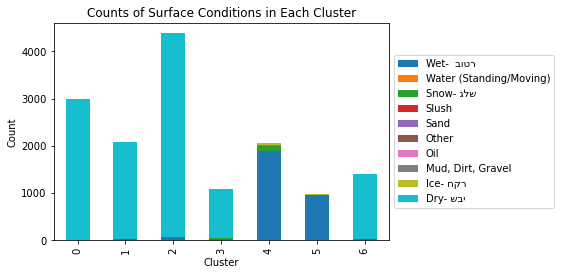

In [19]:
# Define the names for each Surface Condition type
surface_condition_names = {
    'Surface Condition_WET': 'Wet-  בוטר',
    'Surface Condition_WATER(STANDING/MOVING)': 'Water (Standing/Moving)',
    'Surface Condition_SNOW': 'Snow- גלש',
    'Surface Condition_SLUSH': 'Slush',
    'Surface Condition_SAND': 'Sand',
    'Surface Condition_OTHER': 'Other',
    'Surface Condition_OIL': 'Oil',
    'Surface Condition_MUD, DIRT, GRAVEL': 'Mud, Dirt, Gravel',
    'Surface Condition_ICE': 'Ice- חקר',
    'Surface Condition_DRY': 'Dry- שבי'
}

# Select the columns for Surface Condition and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(surface_condition_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Surface Condition type
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Surface Conditions in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [surface_condition_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Light

<Figure size 864x432 with 0 Axes>

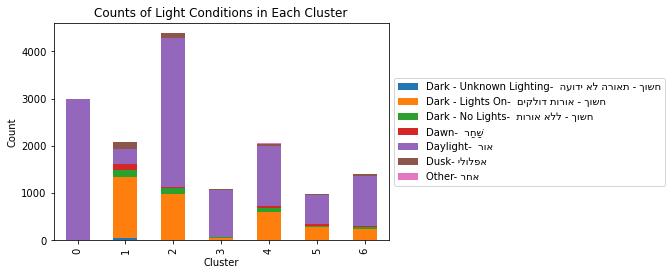

In [20]:
# Define the names for each Light condition
light_names = {
    'Light_DARK -- UNKNOWN LIGHTING': 'Dark - Unknown Lighting-  העודי אל הרואת - ךושח',
    'Light_DARK LIGHTS ON': 'Dark - Lights On-  םיקלוד תורוא - ךושח',
    'Light_DARK NO LIGHTS': 'Dark - No Lights-  תורוא אלל - ךושח',
    'Light_DAWN': 'Dawn-  רַחַׁש',
    'Light_DAYLIGHT': 'Daylight-  רוא',
    'Light_DUSK': 'Dusk- ילולפא',
    'Light_OTHER': 'Other- רחא'
}

# Select the columns for Light and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(light_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Light condition
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Light Conditions in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [light_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Injury Severity

<Figure size 864x432 with 0 Axes>

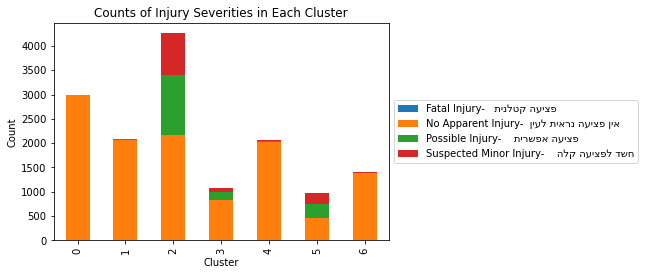

In [21]:
# Define the names for each Injury Severity
injury_severity_names = {
    'Injury Severity_FATAL INJURY': 'Fatal Injury-   תינלטק העיצפ',
    'Injury Severity_NO APPARENT INJURY': 'No Apparent Injury-  ןיעל תיארנ העיצפ ןיא',
    'Injury Severity_POSSIBLE INJURY': 'Possible Injury-    תירשפא העיצפ',
    'Injury Severity_SUSPECTED MINOR INJURY': 'Suspected Minor Injury-    הלק העיצפל דשח'
}

# Select the columns for Injury Severity and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(injury_severity_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Injury Severity
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Injury Severities in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [injury_severity_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Vehicle Damage Extent

<Figure size 864x432 with 0 Axes>

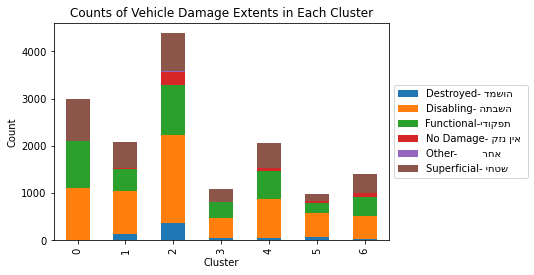

In [22]:
# Define the names for each Vehicle Damage Extent
vehicle_damage_extent_names = {
    'Vehicle Damage Extent_DESTROYED':  'Destroyed- דמשוה',
    'Vehicle Damage Extent_DISABLING':  'Disabling- התבשה',
    'Vehicle Damage Extent_FUNCTIONAL': 'Functional-ידוקפת',
    'Vehicle Damage Extent_NO DAMAGE':  'No Damage- קזנ ןיא ',
    'Vehicle Damage Extent_OTHER':      'Other-        רחא ',
    'Vehicle Damage Extent_SUPERFICIAL':'Superficial- יחטש'
}

# Select the columns for Vehicle Damage Extent and Cluster from the original DataFrame
selected_columns = ['Cluster'] + list(vehicle_damage_extent_names.keys())
selected_df = df_original[selected_columns]

# Group the data by Cluster and calculate the counts of each Vehicle Damage Extent
grouped_data = selected_df.groupby('Cluster').sum()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Counts of Vehicle Damage Extents in Each Cluster')

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
updated_labels = [vehicle_damage_extent_names[label] for label in labels]
ax.legend(handles, updated_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()
